# Premier Neurone 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs  # Importation de make_blobs pour générer des données synthétiques de classification
import matplotlib.pyplot as plt  # Importation de matplotlib pour la visualisation

## <span style="color:#3498db;">Création de données pour un modèle de Perceptron</span>
- **<span style="color:#2ecc71;">Données</span>** : Génération de données de classification binaire pour entraîner le perceptron.
- **<span style="color:#f39c12;">Visualisation</span>** : Affichage des données dans un espace 2D, colorées par classe.

dimensions de X: (100, 2)
dimensions de y: (100, 1)


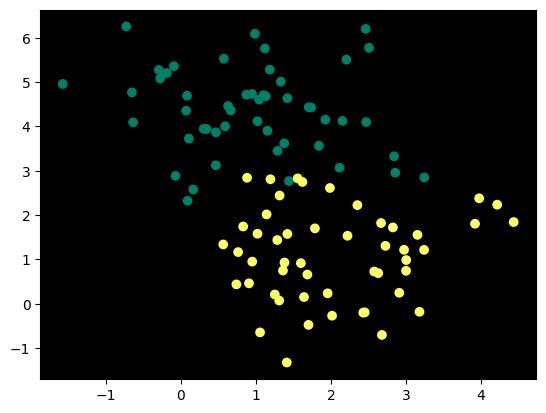

In [2]:
# Génération de données de classification binaire avec 2 centres
X, y = make_blobs(n_samples=100,        # n_samples : nombre d'échantillons à générer, ici 100
                  n_features=2,         # n_features : nombre de caractéristiques (ou dimensions) par échantillon, ici 2
                  centers=2,            # centers : nombre de centres (ou classes) pour les données, ici 2 pour une classification binaire
                  random_state=0)       # random_state : graine pour la reproductibilité des données

# Reshape de y pour obtenir une colonne (nécessaire pour certaines étapes ultérieures)
y = y.reshape((y.shape[0], 1))          # Redimensionne y en (100, 1), pour avoir une colonne de labels

# Affichage des dimensions des données
print('dimensions de X:', X.shape)      # Affiche les dimensions de X : (100, 2)
print('dimensions de y:', y.shape)      # Affiche les dimensions de y : (100, 1)

# Visualisation des données générées dans un espace 2D
fig, ax = plt.subplots()                # Création d'une figure et d'un sous-graphique (axes)
ax.set_facecolor('black')               # Définition de la couleur de fond en noir pour un meilleur contraste
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')  # Scatter plot : chaque point est coloré selon sa classe (c=y)

# Affichage de la figure
plt.show()                              # Affiche la visualisation des données

# 2. <span style="color:#3498db;">Définition des fonctions pour un modèle de Perceptron</span>
- **<span style="color:#2ecc71;">Initialisation</span>** : Génération aléatoire des poids et du biais pour démarrer l'algorithme.
- **<span style="color:#2ecc71;">Modèle</span>** : Calcul de l'activation pour prédire la probabilité d'appartenance à une classe.
- **<span style="color:#2ecc71;">Fonction de perte</span>** : Calcul de l'erreur moyenne entre les prédictions et les labels réels.
- **<span style="color:#2ecc71;">Gradients</span>** : Calcul des dérivées pour ajuster les poids et le biais dans le sens de réduction de l'erreur.
- **<span style="color:#2ecc71;">Mise à jour</span>** : Ajustement des poids et biais en fonction des gradients.
- **<span style="color:#2ecc71;">Prédiction</span>** : Fonction de prédiction pour évaluer de nouvelles données.


In [3]:
# Initialisation des paramètres (poids et biais)
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)  # Initialisation aléatoire de W (de taille (n_features, 1))
    b = np.random.randn(1)              # Initialisation aléatoire de b (de taille (1,))
    return (W, b)                       # Retourne les poids et biais initialisés


In [4]:
def model(X, W, b):
    Z = X.dot(W) + b           # Z=X.W+b et X.W (m,n)x(n,1)=(m,1)  dot= x matrice numpy
    A = 1 / (1 + np.exp(-Z))
    return A # verif: A = model(X, W, b) puis A.shape  # -> (100, 1) ok = (nbre_lignes, 1)



In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
# verif: log_loss(A, y) # -> 1.08... = 1 réel ok

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)  # attention a la transposée de X dans la formule
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db) # test: dW, db = gradients(A, X, y) et dW.shape  # ->(2, 1) db.shape  # ->(1,1)

In [7]:
def update(dW, db, W, b, learning_rate):  # learning_rate = alpha de la formule
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)  # a tester update(..) 

In [8]:
def predict(X, W, b):  # methode de prédiction basique
    A = model(X, W, b)
    print(A)           # affiche la probabilité A = sigmoide
    return A >= 0.5  # -> array_boolean True ou False

In [9]:
from sklearn.metrics import accuracy_score

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100): # n_iter = nbre de boucles
    W, b = initialisation(X)                          # initialisation W, b
    Loss = []                                         # archiver les couts Loss

    for i in range(n_iter):                           # on boucle sur n_iter nos fct°
        A = model(X, W, b)                            # calcul de A sur X, W, b
        Loss.append(log_loss(A, y))                   # calcul du Loss sur A, y et archivage résultat
        dW, db = gradients(A, X, y)                   # calcul des gradients
        W, b = update(dW, db, W, b, learning_rate)    # mise à jour de W et b

    y_pred = predict(X, W, b)                         # array_bool sur X avec W, b final true = classe 1 pour y_pred
    print("score de précision = ", accuracy_score(y, y_pred))  # ->0.89    # voir si y_pred et y sont exactement = avec accuracy=exactitude

    plt.plot(Loss)         # affichage de la courbe de cout Loss ( x=n_iter=100 pts, y=Loss archivé )
    plt.show()

    return (W, b)
    

[[0.95824095]
 [0.72269384]
 [0.00828152]
 [0.14738748]
 [0.9508197 ]
 [0.35418801]
 [0.08599704]
 [0.93805898]
 [0.05960312]
 [0.83144531]
 [0.04124932]
 [0.84234878]
 [0.03647964]
 [0.02417132]
 [0.69197465]
 [0.97723153]
 [0.98536987]
 [0.04581631]
 [0.68661982]
 [0.61635694]
 [0.05893706]
 [0.04701813]
 [0.39203676]
 [0.0081629 ]
 [0.93400783]
 [0.043045  ]
 [0.85734954]
 [0.01381163]
 [0.08375306]
 [0.72575108]
 [0.96628738]
 [0.05722087]
 [0.63300565]
 [0.9668301 ]
 [0.40759329]
 [0.25878178]
 [0.74357411]
 [0.54520314]
 [0.47461351]
 [0.43273264]
 [0.07784525]
 [0.09988972]
 [0.00162395]
 [0.18563454]
 [0.21056012]
 [0.81354181]
 [0.94963951]
 [0.94082001]
 [0.00719482]
 [0.01452361]
 [0.9161668 ]
 [0.5306841 ]
 [0.06579442]
 [0.05486511]
 [0.80545048]
 [0.05595313]
 [0.70480123]
 [0.79129027]
 [0.93397025]
 [0.98401284]
 [0.62257507]
 [0.20663376]
 [0.00788197]
 [0.90690005]
 [0.02188669]
 [0.37217542]
 [0.04479659]
 [0.62296713]
 [0.92686096]
 [0.29175293]
 [0.19425869]
 [0.89

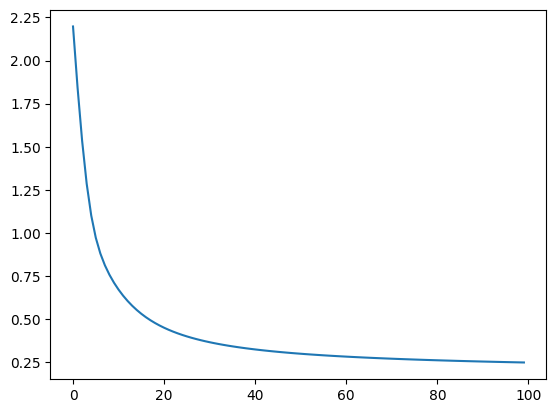

In [11]:
W, b = artificial_neuron(X, y)

In [12]:
W, b  # -> (array([[ 1.41326547],[-0.97447217]]),   array([-0.00216797]))

(array([[ 1.16332174],
        [-0.94462596]]),
 array([0.33618154]))

## test sur une nouvelle plante ( car pas de test_set ici)

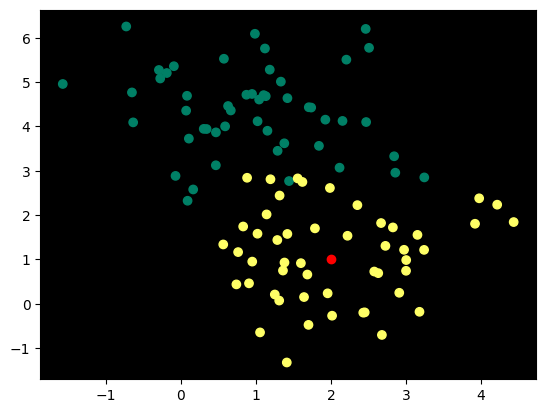

[0.84789672]


array([ True])

In [13]:
new_plant = np.array([2,1])

fig, ax = plt.subplots()
ax.set_facecolor('black')

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')  # anciennes données
plt.scatter(new_plant[0], new_plant[1], c='red')  # affcihe en rouge new_plant
plt.show()
predict(new_plant, W, b) # -> array([true]) on considère qu'elle est toxique car True meme si non définit ici
# affiche aussi A = proba selon sigmoide = 0.86% de fiabilité de prédiction

# 3. Frontiere de décision z(x1, x2) = 0

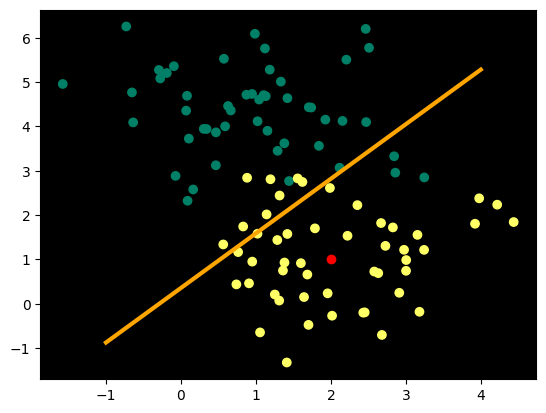

In [14]:
new_plant = np.array([2,1])     # choix coordonnées vu sur graphe

x1 = np.linspace(-1, 4, 100)    # choix axe x vu sur graphe, et 100 points
x2 = ( - W[0] * x1 - b) / W[1]  # équation de la frontière de décision

fig, ax = plt.subplots()
ax.set_facecolor('black')

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')  # anciennes données
plt.scatter(new_plant[0], new_plant[1], c='red')  # affiche en rouge new_plant
plt.plot(x1, x2, c='orange', lw=3)                # en orange la frontiere de décision      
plt.show()

# 4. Visualisations 3D

In [1]:

"""très rare  d'avoir que 2 variables X et non visualisable si + de dim"""

"très rare  d'avoir que 2 variables X et non visualisable si + de dim"

In [16]:
# pip install plotly
import plotly.graph_objects as go 

In [17]:
fig = go.Figure(data=[go.Scatter3d(   
    x=X[:, 0].flatten(),              
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [18]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b   # fct linéaire Z ici de param W et b en foct de X
A = 1 / (1 + np.exp(-Z))          # fonction d'activation sigmoide ici

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


## test d'animation de l'historique d'apprentissage !

In [19]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 200): # n_iter = nbre de boucles  -> 400 pour video + longue = + d'historique
    W, b = initialisation(X)                          # initialisation W, b
    Loss = []                                         # archiver les couts Loss

    history = []    # RAJOUT ICI
    
    for i in range(n_iter):                           # on boucle sur n_iter nos fct°
        A = model(X, W, b)                            # calcul de A sur X, W, b
        Loss.append(log_loss(A, y))                   # calcul du Loss sur A, y et archivage résultat
        dW, db = gradients(A, X, y)                   # calcul des gradients
        W, b = update(dW, db, W, b, learning_rate)    # mise à jor de W et b
        history.append([W, b, Loss, i]) # RAJOUT ICI DES PARAMS A ARCHIVER params 0, 1, 2, 3 de fct animate ensuite

    y_pred = predict(X, W, b)                         # array_bool sur X avec W, b final true = classe 1 pour y_pred
    print("score de précision = ", accuracy_score(y, y_pred))  # ->0.89    # voir si y_pred et y sont exactement = avec accuracy=exactitude

    plt.plot(Loss)         # affichage de la courbe de cout Loss ( x=n_iter=100 pts, y=Loss archivé )
    plt.show()

    return history  # CHAGEMENT DU RETURN ICI

In [20]:
def animate(params):   # définition des fonctions à animer - 3 fct ici
    W = params[0]      
    b = params [1]     # définition de params ( ici 4 éléments )
    loss = params[2]    
    i = params[3]
    
    # definition des 3 figures nommées ax[0] à ax[2]
    ax[0].clear()  # frontière de décision
    ax[1].clear()  # sigmoide
    ax[2].clear()  # fonction cout
    
    ax[0].set_facecolor('black')  # fond du graph en noir
    ax[1].set_facecolor('black')
    ax[2].set_facecolor('black')
    
    s = 300
    # frontiere de decision - 1
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolor='k', linewidths=3)
    
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    
    x1 = np.linspace(-3, 6, 100)
    x2 = ( -W[0] * x1 - b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)
    
    ax[0].set_xlim(X[:,0].min(), X[:,0].max())
    ax[0].set_ylim(X[:,1].min(), X[:,1].max())
    ax[0].set_title('Frontière de Décision', fontsize=30, color='white') # changer les taille de police et couleur si besoin
    ax[0].set_xlabel('x1', fontsize=25, color='yellow')
    ax[0].set_ylabel('x2', fontsize=25, color='yellow')
    ax[0].tick_params(labelcolor='tab:orange', labelsize=20)
    
    # sigmoide - 2
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='#008066', edgecolors='k', linewidths=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==0].shape), c='#ffff66', edgecolors='k', linewidths=3, s=s)
    # ax[1].vlines(x=0, ymin=0, ymax=1, colors='red') # frontiere de decision
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title('Sigmoïde', fontsize=30, color='white')
    ax[1].set_xlabel('Z', fontsize=25, color='yellow')
    ax[1].set_ylabel('A(Z)', fontsize=25, color='yellow')
    ax[1].tick_params(labelcolor='tab:orange', labelsize=20)
    
    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], ymin=0, ymax= 1 / ( 1 + np.exp(-z[y==0][j])), colors='red', alpha=0.5, zorder=-1)
        

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], ymin=0, ymax= 1 / ( 1 + np.exp(-z[y==1][j])), colors='red', alpha=0.5, zorder=-1)
    
    # fonction cout - 3
    ax[2].plot(range(i), loss[:i], color='red', lw=4)
    ax[2].set_xlim(loss[-1] * 0.8, len(loss))
    ax[2].set_ylim(0, loss[0] * 1.1)
    ax[2].set_title('Fonction Cout', fontsize=30, color='white')
    ax[2].set_xlabel('Itération', fontsize=25, color='yellow')
    ax[2].set_ylabel('Loss', fontsize=25, color='yellow') 
    ax[2].tick_params(labelcolor='tab:orange', labelsize=20)



[[9.87665571e-01]
 [9.23961397e-01]
 [8.89875507e-04]
 [1.36575192e-01]
 [9.90658610e-01]
 [3.54211601e-01]
 [2.96256073e-02]
 [9.77838893e-01]
 [1.92162339e-02]
 [9.68550164e-01]
 [9.50358755e-03]
 [9.64727004e-01]
 [5.43913015e-03]
 [4.99662650e-03]
 [8.46074534e-01]
 [9.95350798e-01]
 [9.99017671e-01]
 [1.39830379e-02]
 [9.08008749e-01]
 [8.03536307e-01]
 [1.36552612e-02]
 [1.18393530e-02]
 [4.41224927e-01]
 [8.22658148e-04]
 [9.89098105e-01]
 [8.88578211e-03]
 [9.76890093e-01]
 [1.04602928e-03]
 [2.23166965e-02]
 [8.39644253e-01]
 [9.97138085e-01]
 [1.36184447e-02]
 [8.50197919e-01]
 [9.97189402e-01]
 [4.24659066e-01]
 [1.37766716e-01]
 [9.17072459e-01]
 [6.14203623e-01]
 [4.70921725e-01]
 [6.26006401e-01]
 [4.63340914e-02]
 [1.64816498e-02]
 [6.34265302e-05]
 [1.06521477e-01]
 [1.75310992e-01]
 [9.32489486e-01]
 [9.95308392e-01]
 [9.94739839e-01]
 [8.67323007e-04]
 [1.46831352e-03]
 [9.88119504e-01]
 [7.49723694e-01]
 [7.59763958e-03]
 [1.06002613e-02]
 [8.71739455e-01]
 [1.260174

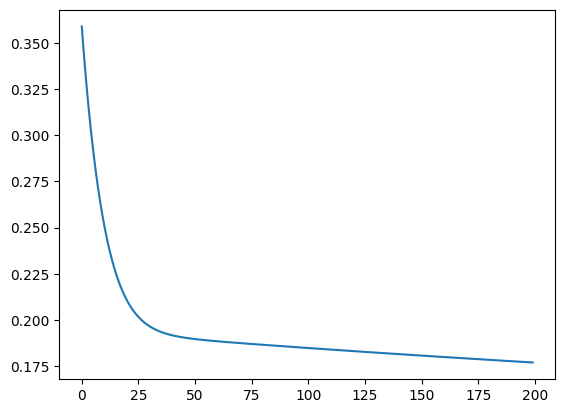

In [21]:
history = artificial_neuron(X, y)

## def timer et création du mp4

In [22]:
import time
start_time = time.time()  # Temps avant exécution

Durée d'exécution : 1.22e+02s


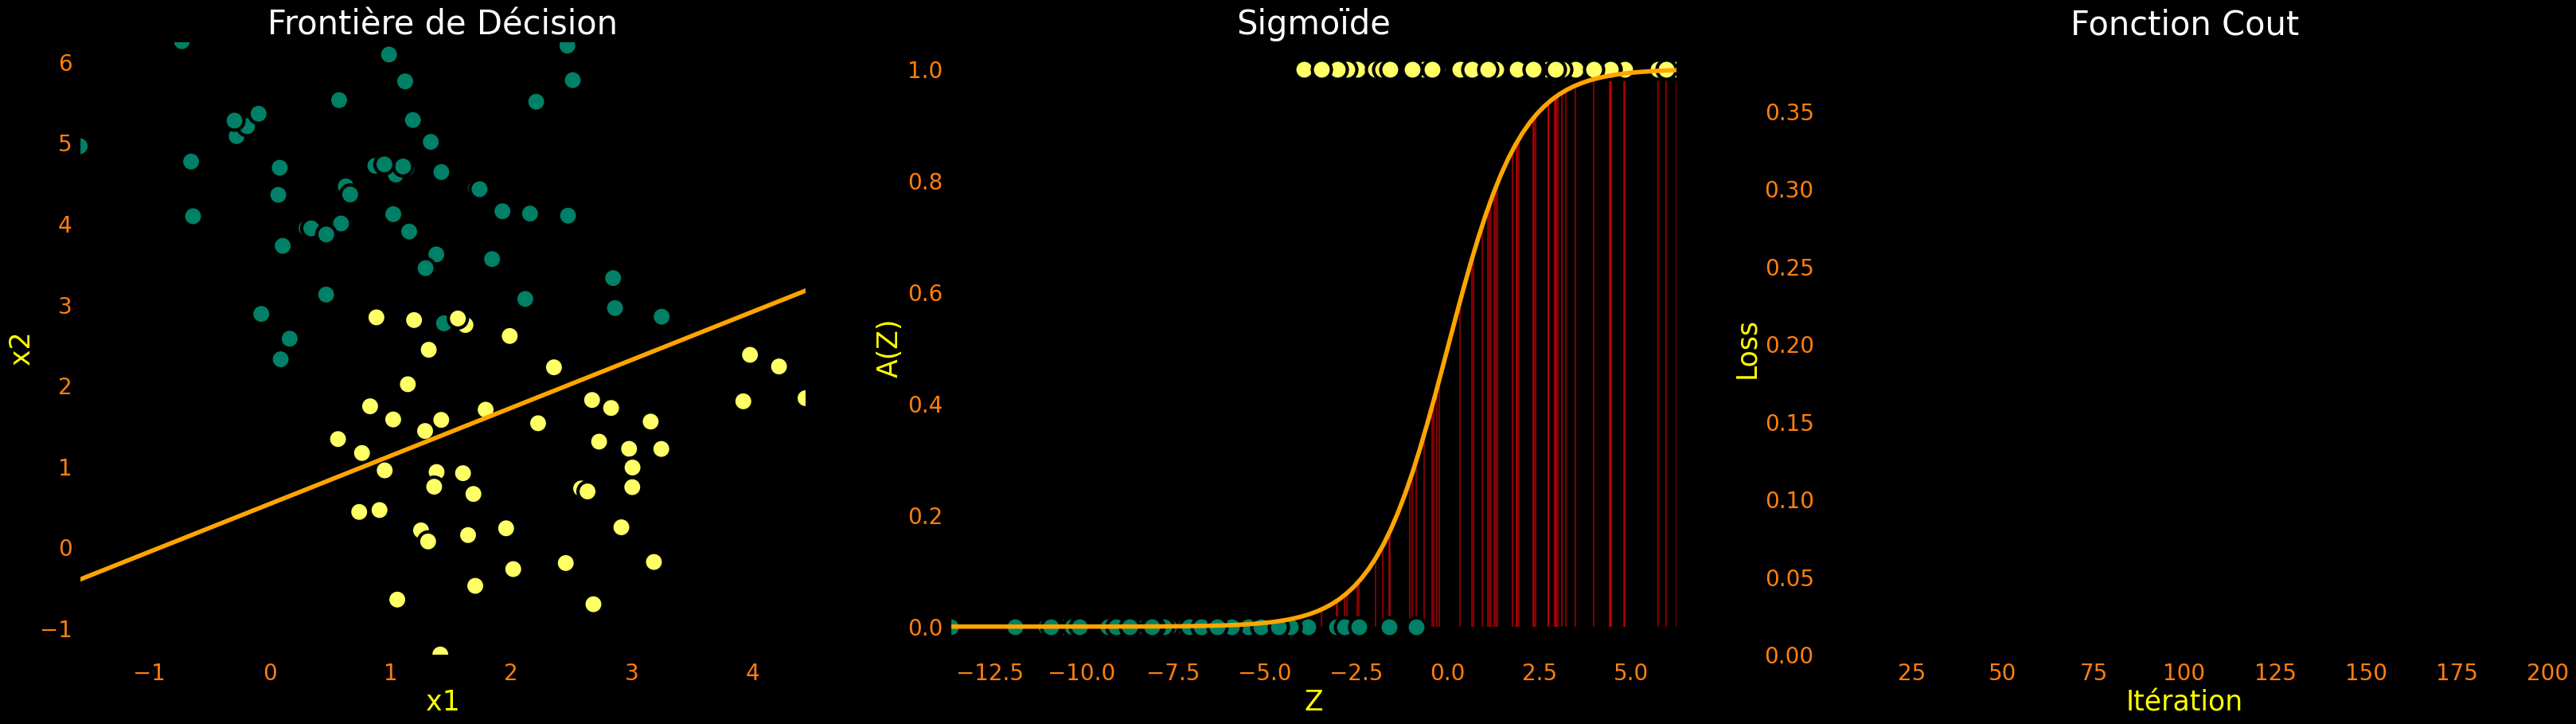

In [23]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10), facecolor=('black'))

ani = FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)

import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me', bitrate=3200))
ani.save('animation.mp4', writer=writer)

end_time = time.time()  # Temps après exécution
print("Durée d'exécution : {:.3}s".format(end_time - start_time))
